In [1]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [19]:
# 查看训练数据的大小
print(mnist.train.images.shape)  # (55000, 784)
print(mnist.train.labels.shape)  # (55000, 10)
 
# 查看验证数据的大小
print(mnist.validation.images.shape)  # (5000, 784)
print(mnist.validation.labels.shape)  # (5000, 10)
 
# 查看测试数据的大小
print(mnist.test.images.shape)  # (10000, 784)
print(mnist.test.labels.shape)  # (10000, 10)

(55000, 784)
(55000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)


In [20]:
import tensorflow as tf

In [21]:
#简单的softmax网络


x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

#W = tf.Variable(tf.zeros([784,10]))

W1 = tf.get_variable("W1", [784,100], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b1 = tf.Variable(tf.zeros([100]))
# 一层fc
fc1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# tf.contrib.layers.fully_connected();

W2 = tf.get_variable("W2", [100,10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b2 = tf.Variable(tf.zeros([10]))
# softmax层,不接激活函数
# 类别预测
y = tf.nn.softmax(tf.matmul(fc1,W2) + b2)

# 损失函数
# 损失函数是目标类别和预测类别之间的交叉熵
cross_entropy = - tf.reduce_sum(y_*tf.log(y))

# 训练模型
# 我们用最速下降法让交叉熵下降，步长为0.01.
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#评估准确率
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1001):
        batch = mnist.train.next_batch(50)
        # 通过feed_dict将x 和 y_张量占位符用训练训练数据替代。
        sess.run(train_step,feed_dict={x: batch[0], y_: batch[1]})
        # train准确率
        train_acc = accuracy.eval(feed_dict={x:mnist.train.images, y_: mnist.train.labels})
        #整个valid的准确率
        valid_acc = accuracy.eval(feed_dict={x:mnist.validation.images, y_: mnist.validation.labels})
        if(i%100==0):
            print('************************')
            print('iter = %d , the cost = %f '%(i,sess.run(cross_entropy,feed_dict={x: batch[0], y_: batch[1]})))
            print('iter = %d , the train_acc = %f '%(i, train_acc))
            print('iter = %d , the valid_acc = %f '%(i, valid_acc))
              
    # 测试数据上的准确率
    print('test_acc:',accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

************************
iter = 0 , the cost = 96.617943 
iter = 0 , the train_acc = 0.122855 
iter = 0 , the valid_acc = 0.123000 
************************
iter = 100 , the cost = 14.952341 
iter = 100 , the train_acc = 0.893000 
iter = 100 , the valid_acc = 0.901600 
************************
iter = 200 , the cost = 6.303292 
iter = 200 , the train_acc = 0.916891 
iter = 200 , the valid_acc = 0.920400 
************************
iter = 300 , the cost = 3.752239 
iter = 300 , the train_acc = 0.933891 
iter = 300 , the valid_acc = 0.939400 
************************
iter = 400 , the cost = 2.879813 
iter = 400 , the train_acc = 0.943273 
iter = 400 , the valid_acc = 0.951200 
************************
iter = 500 , the cost = 2.485392 
iter = 500 , the train_acc = 0.950600 
iter = 500 , the valid_acc = 0.952600 
************************
iter = 600 , the cost = 3.448860 
iter = 600 , the train_acc = 0.947255 
iter = 600 , the valid_acc = 0.949200 
************************
iter = 700 , the cos

In [22]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])


# 权重在初始化时应该加入少量的噪声来打破对称性以及避免0梯度
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
# 使用的是ReLU神经元，因此比较好的做法是用一个较小的正数来初始化偏置项，
# 以避免神经元节点输出恒为0的问题（dead neurons）
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
# 我们的卷积使用1步长（stride size），0边距（padding size）的模板，
# 保证输出和输入是同一个大小
def conv2d(x, W):
    
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# 池化用简单传统的2x2大小的模板做max pooling
def max_pool_2x2(x):
    
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


x_image = tf.reshape(x, [-1,28,28,1])
# 第一层卷积
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积
# 每个5x5的patch会得到64个特征
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 密集连接层
# 图片尺寸减小到7x7，我们加入一个有1024个神经元的全连接层，用于处理整个图片

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
# 池化层输出的张量reshape成一些向量，乘上权重矩阵，加上偏置，然后对其使用ReLU
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
# 为了减少过拟合，我们在输出层之前加入dropout

# 注意：：在训练过程中启用dropout，在测试过程中关闭dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 输出层
# 添加一个softmax层
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 损失函数
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
# 训练方法
# ADAM优化器来做梯度最速下降
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# 计算准确率
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

with tf.Session() as sess:
    
    # 初始化变量
    sess.run(tf.global_variables_initializer())

    for i in range(1001):
        batch = mnist.train.next_batch(50)
        sess.run(train_step,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        if i%100 == 0:
            #train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0}) # 与下面写法一样
            train_accuracy = sess.run(accuracy,feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
            print ("step %d, training accuracy %g"%(i, train_accuracy))
        

    # 测试的时候，不用dropout
    print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))  

step 0, training accuracy 0.14
step 100, training accuracy 0.9
step 200, training accuracy 0.92
step 300, training accuracy 0.9
step 400, training accuracy 0.9
step 500, training accuracy 0.98
step 600, training accuracy 0.98
step 700, training accuracy 0.9
step 800, training accuracy 0.94
step 900, training accuracy 0.98
step 1000, training accuracy 0.94
test accuracy 0.9666


In [17]:
# 参数维度的变化
print(x_image.shape)
print(h_conv1.shape)
print(h_pool1.shape)
print(h_conv2.shape)
print(h_pool2.shape)

print(h_pool2_flat.shape)
print(h_fc1.shape)
print(y_conv.shape)


(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 32)
(?, 14, 14, 64)
(?, 7, 7, 64)
(?, 3136)
(?, 1024)
(?, 10)


In [1]:
import tensorflow as tf

# leNet5 网络实现

INPUT_NODE = 784
OUTPUT_NODE = 10

IMAGE_SIZE = 28
NUM_CHANNELS = 1
NUM_LABELS = 10

CONV1_DEEP = 32
CONV1_SIZE = 5

CONV2_DEEP = 64
CONV2_SIZE = 5

FC_SIZE = 512


# 整个网络结构
# input_tensor = 28*28*1
def inference(input_tensor, train, regularizer):  
    with tf.variable_scope('layer1-conv1'):
        # 5*5*1,32个
        conv1_weights = tf.get_variable(
            "weight", [CONV1_SIZE, CONV1_SIZE, NUM_CHANNELS, CONV1_DEEP],
            initializer=tf.truncated_normal_initializer(stddev=0.1))
        conv1_biases = tf.get_variable("bias", [CONV1_DEEP], initializer=tf.constant_initializer(0.0))
        conv1 = tf.nn.conv2d(input_tensor, conv1_weights, strides=[1, 1, 1, 1], padding='SAME')
        relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_biases))

    with tf.name_scope("layer2-pool1"):
        pool1 = tf.nn.max_pool(relu1, ksize = [1,2,2,1],strides=[1,2,2,1],padding="SAME")
        
    # 5*5*32,64个
    with tf.variable_scope("layer3-conv2"):
        conv2_weights = tf.get_variable(
            "weight", [CONV2_SIZE, CONV2_SIZE, CONV1_DEEP, CONV2_DEEP],
            initializer=tf.truncated_normal_initializer(stddev=0.1))
        conv2_biases = tf.get_variable("bias", [CONV2_DEEP], initializer=tf.constant_initializer(0.0))
        conv2 = tf.nn.conv2d(pool1, conv2_weights, strides=[1, 1, 1, 1], padding='SAME')
        relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_biases))
    
    with tf.name_scope("layer4-pool2"):
        pool2 = tf.nn.max_pool(relu2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        pool_shape = pool2.get_shape().as_list()
        nodes = pool_shape[1] * pool_shape[2] * pool_shape[3]
        reshaped = tf.reshape(pool2, [-1, nodes])
    # 全连接1
    with tf.variable_scope('layer5-fc1'):
        fc1_weights = tf.get_variable("weight", [nodes, FC_SIZE],
                                      initializer=tf.truncated_normal_initializer(stddev=0.1))
        #正则化:将fc1_weights的正则化项，加入到‘losses’的集合中，这样到时候就可以在计算loss的时候，取得
        if regularizer != None: 
            tf.add_to_collection('losses', regularizer(fc1_weights))
            
        fc1_biases = tf.get_variable("bias", [FC_SIZE], initializer=tf.constant_initializer(0.1))

        fc1 = tf.nn.relu(tf.matmul(reshaped, fc1_weights) + fc1_biases)
        # droup
        if train: 
            fc1 = tf.nn.dropout(fc1, 0.5)
            
    # 全连接2
    with tf.variable_scope('layer6-fc2'):
        # 512*10
        fc2_weights = tf.get_variable("weight", [FC_SIZE, NUM_LABELS],
                                      initializer=tf.truncated_normal_initializer(stddev=0.1))
        #正则化:将fc2_weights的正则化项，加入到‘losses’的集合中，这样到时候就可以在计算loss的时候，取得
        if regularizer != None: 
            tf.add_to_collection('losses', regularizer(fc2_weights))
            
        fc2_biases = tf.get_variable("bias", [NUM_LABELS], initializer=tf.constant_initializer(0.1))
        
        logit = tf.matmul(fc1, fc2_weights) + fc2_biases

    return logit



In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np

# train params
BATCH_SIZE = 100
LEARNING_RATE_BASE = 0.01
LEARNING_RATE_DECAY = 0.99
REGULARIZATION_RATE = 0.0001
TRAINING_STEPS = 6000
MOVING_AVERAGE_DECAY = 0.99

def train(mnist):
    # 定义输出为4维矩阵的placeholder
    x = tf.placeholder(tf.float32, [
            None,
            IMAGE_SIZE,
            IMAGE_SIZE,
            NUM_CHANNELS],
        name='x-input')
    y_ = tf.placeholder(tf.float32, [None, OUTPUT_NODE], name='y-input')
    
    regularizer = tf.contrib.layers.l2_regularizer(REGULARIZATION_RATE)
    # 不要drop out ,train=false
    y = inference(x,False,regularizer)
    
    
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y, labels=tf.argmax(y_, 1))
    cross_entropy_mean = tf.reduce_mean(cross_entropy)
    
    # 加上正则化，取得保存在集合‘losses’中的值
    loss = cross_entropy_mean + tf.add_n(tf.get_collection('losses'))
    
    # 加上学习率削减
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(
        LEARNING_RATE_BASE,
        global_step,
        mnist.train.num_examples / BATCH_SIZE,
        LEARNING_RATE_DECAY,
        staircase=True)
    
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step) # global_step会自动更新
    
    
    # 计算准确率
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
    # 初始化TensorFlow持久化类。
    saver = tf.train.Saver()
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        reshaped_valid = np.reshape(mnist.validation.images, (
                -1,
                IMAGE_SIZE,
                IMAGE_SIZE,
                NUM_CHANNELS))
        for i in range(TRAINING_STEPS):
            xs, ys = mnist.train.next_batch(BATCH_SIZE)
            reshaped_xs = np.reshape(xs, (
                BATCH_SIZE,
                IMAGE_SIZE,
                IMAGE_SIZE,
                NUM_CHANNELS))
            _, loss_value, step = sess.run([train_step, loss, global_step], feed_dict={x: reshaped_xs, y_: ys})
            if i % 1000 == 0:
                print("After %d training step(s), loss on training batch is %g." % (step, loss_value))
                #整个valid的准确率
                valid_acc = accuracy.eval(feed_dict={x:reshaped_valid, y_: mnist.validation.labels})
                print("After %d training step(s), valid acc is %g." % (step, valid_acc))
              
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)               
train(mnist)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
After 1 training step(s), loss on training batch is 4.2328.
After 1 training step(s), valid acc is 0.1478.
After 1001 training step(s), loss on training batch is 0.832663.
After 1001 training step(s), valid acc is 0.9646.
After 2

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
Evaluate model before training.
Root Mean Square Error is: 0.698327


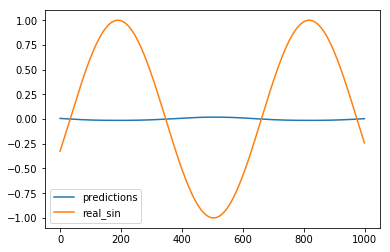

train step: 0, loss: 0.47449195
train step: 1000, loss: 0.0010278285
train step: 2000, loss: 0.00046095287
train step: 3000, loss: 7.245521e-05
train step: 4000, loss: 1.8394514e-05
train step: 5000, loss: 4.6618907e-06
train step: 6000, loss: 3.0391132e-06
train step: 7000, loss: 3.0150159e-06
train step: 8000, loss: 1.8763842e-06
train step: 9000, loss: 2.7545898e-06
Evaluate model after training.
Root Mean Square Error is: 0.001580


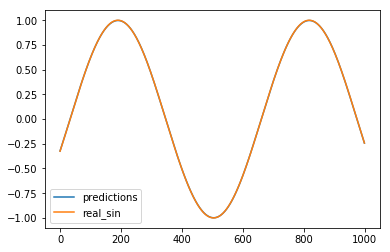

In [1]:
# rnn模型

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

HIDDEN_SIZE = 30                            # LSTM中隐藏节点的个数。
NUM_LAYERS = 2                              # LSTM的层数。
TIMESTEPS = 10                              # 循环神经网络的训练序列长度。
TRAINING_STEPS = 10000                      # 训练轮数。
BATCH_SIZE = 32                             # batch大小。
TRAINING_EXAMPLES = 10000                   # 训练数据个数。
TESTING_EXAMPLES = 1000                     # 测试数据个数。
SAMPLE_GAP = 0.01                           # 采样间隔。

# 
def generate_data(seq):
    X = []
    y = []
    # 序列的第i项和后面的TIMESTEPS-1项合在一起作为输入；第i + TIMESTEPS项作为输
    # 出。即用sin函数前面的TIMESTEPS个点的信息，预测第i + TIMESTEPS个点的函数值。
    for i in range(len(seq) - TIMESTEPS):
        X.append([seq[i: i + TIMESTEPS]])
        y.append([seq[i + TIMESTEPS]])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)  

# 用正弦函数生成训练和测试数据集合。
test_start = (TRAINING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP
test_end = test_start + (TESTING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP
train_X, train_y = generate_data(np.sin(np.linspace(
    0, test_start, TRAINING_EXAMPLES + TIMESTEPS, dtype=np.float32)))
test_X, test_y = generate_data(np.sin(np.linspace(
    test_start, test_end, TESTING_EXAMPLES + TIMESTEPS, dtype=np.float32)))

def lstm_model(X, y, is_training):
    # 使用多层的LSTM结构。
    cell = tf.nn.rnn_cell.MultiRNNCell([
        tf.nn.rnn_cell.BasicLSTMCell(HIDDEN_SIZE) for _ in range(NUM_LAYERS)])    # 多层rnn

    # 使用TensorFlow接口将多层的LSTM结构连接成RNN网络并计算其前向传播结果。
    outputs, _ = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    output = outputs[:, -1, :]

    # 对LSTM网络的输出再做加一层全链接层并计算损失。注意这里默认的损失为平均
    # 平方差损失函数。
    predictions = tf.contrib.layers.fully_connected(
        output, 1, activation_fn=None)
    
    # 只在训练时计算损失函数和优化步骤。测试时直接返回预测结果。
    if not is_training:
        return predictions, None, None
        
    # 计算损失函数。
    loss = tf.losses.mean_squared_error(labels=y, predictions=predictions)

    # 创建模型优化器并得到优化步骤。
    train_op = tf.contrib.layers.optimize_loss(loss, tf.train.get_global_step(),
        optimizer="Adagrad", learning_rate=0.1)
    return predictions, loss, train_op


def run_eval(sess, test_X, test_y):
    # 将测试数据以数据集的方式提供给计算图。
    ds = tf.data.Dataset.from_tensor_slices((test_X, test_y))
    ds = ds.batch(1)
    X, y = ds.make_one_shot_iterator().get_next()
    
    # 调用模型得到计算结果。这里不需要输入真实的y值。计算loss才需要
    with tf.variable_scope("model", reuse=True):
        prediction, _, _ = lstm_model(X, [0.0], False)
    
    # 将预测结果存入一个数组。
    predictions = []
    labels = []
    for i in range(TESTING_EXAMPLES):
        p, l = sess.run([prediction, y])
        predictions.append(p)
        labels.append(l)

    # 计算rmse作为评价指标。
    predictions = np.array(predictions).squeeze()
    labels = np.array(labels).squeeze()
    rmse = np.sqrt(((predictions - labels) ** 2).mean(axis=0))
    print("Root Mean Square Error is: %f" % rmse)
    
    #对预测的sin函数曲线进行绘图。
    plt.figure()
    plt.plot(predictions, label='predictions')
    plt.plot(labels, label='real_sin')
    plt.legend()
    plt.show()
    
# 将训练数据以数据集的方式提供给计算图。
ds = tf.data.Dataset.from_tensor_slices((train_X, train_y))
ds = ds.repeat().shuffle(1000).batch(BATCH_SIZE)
X, y = ds.make_one_shot_iterator().get_next()

# 定义模型，得到预测结果、损失函数，和训练操作。
with tf.variable_scope("model"):
    _, loss, train_op = lstm_model(X, y, True)
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 测试在训练之前的模型效果。
    print("Evaluate model before training.")
    run_eval(sess, test_X, test_y)
    
    # 训练模型。
    for i in range(TRAINING_STEPS):
        _, l = sess.run([train_op, loss])
        if i % 1000 == 0:
            print("train step: " + str(i) + ", loss: " + str(l))
    
    # 使用训练好的模型对测试数据进行预测。
    print("Evaluate model after training.")
    run_eval(sess, test_X, test_y)   